In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")



# Loan Default Prediction — Exploratory Data Analysis (EDA)

**Objective:**  
Understand borrower characteristics and identify factors associated with loan default risk.

**Dataset:** Loan Default Prediction (Kaggle)

**Target Variable:** `default`  
- 1 → Default  
- 0 → No Default


In [30]:
df=pd.read_csv(r'/home/swalih/Desktop/Machine-Learning-ML-/experiments/Loan Default Prediction/Loan_default.csv')
df.head(5)

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


## Dataset Overview

This section examines dataset structure, feature types, and basic statistics.


In [31]:
df.shape

(255347, 18)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [33]:
df.drop('LoanID',axis=1,inplace=True)

In [34]:
df.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


## Target Distribution

We analyze class balance to understand default frequency.
Class imbalance affects model training and evaluation metrics.


In [35]:
df['Default'].value_counts()

Default
0    225694
1     29653
Name: count, dtype: int64

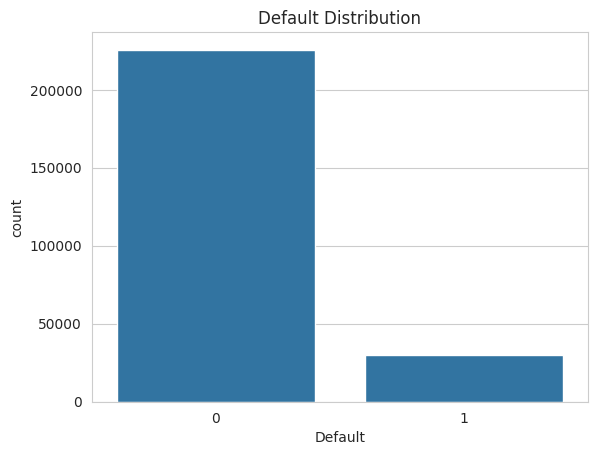

In [36]:
sns.countplot(x=df['Default'],data=df)
plt.title("Default Distribution")
plt.show()

**Insight: Target Imbalance**

The dataset shows strong class imbalance, with significantly fewer default cases compared to non-default cases.

This indicates that accuracy alone is not an appropriate evaluation metric, as a model predicting all borrowers as non-default would still achieve high accuracy.

Therefore, imbalance-aware metrics such as F1-score, ROC-AUC, and recall for the default class will be more appropriate for model evaluation.


## Missing Value Analysis

Missing data impacts model performance and feature engineering strategy.


In [37]:
df.isnull().sum().sort_values(ascending=False)

Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

## Missing Value Analysis

The dataset was examined for missing values across all features.

**Observation:**  
No missing values were found in any column of the dataset.

**Implication:**  
No imputation or feature removal is required at this stage.  
This allows the modeling process to proceed without data completeness concerns.


## Numerical Feature Distribution

We examine distributions to identify skewness and unusual ranges.


In [38]:
num_cols = df.select_dtypes(include=np.number).columns
num_cols


Index(['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Default'],
      dtype='object')

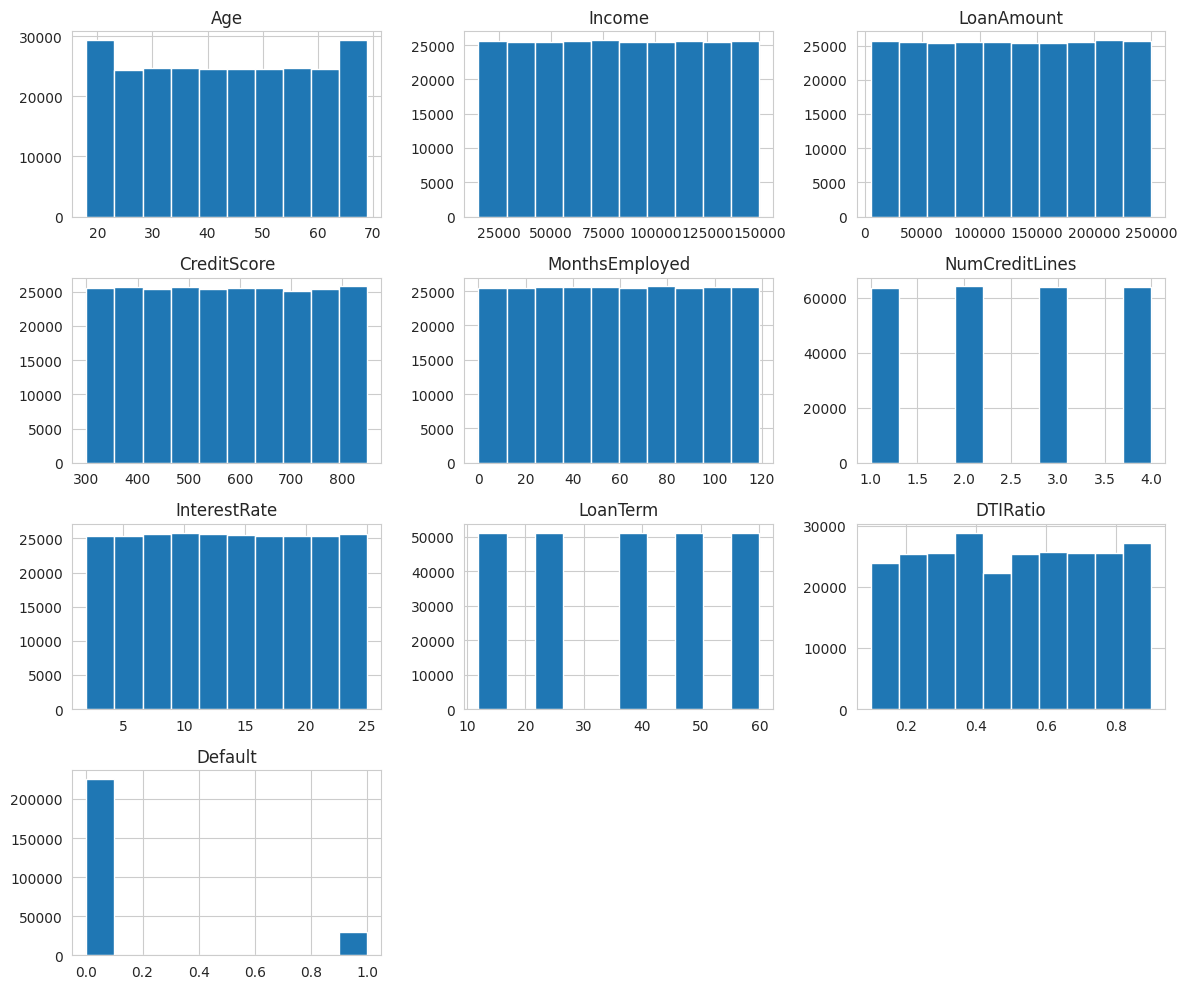

In [39]:
df[num_cols].hist(figsize=(12,10))
plt.tight_layout()
plt.show()


## Outlier Analysis

Financial variables such as income and loan amount often contain extreme values.


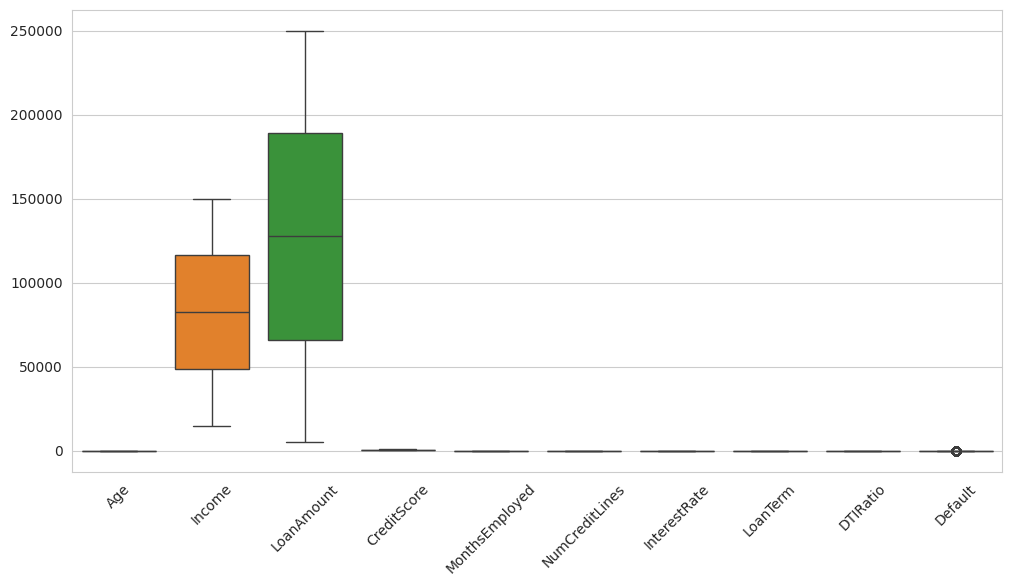

In [40]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[num_cols])
plt.xticks(rotation=45)
plt.show()


**Insight:**  
Extreme outliers are visible in loan-related financial variables.
These may require clipping or transformation.


## Categorical Feature Distribution

We examine frequency of borrower categories.


In [41]:
cat_cols = df.select_dtypes(include="object").columns
cat_cols


Index(['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage',
       'HasDependents', 'LoanPurpose', 'HasCoSigner'],
      dtype='object')

In [42]:
for col in cat_cols:
    print("\n", col)
    print(df[col].value_counts())



 Education
Education
Bachelor's     64366
High School    63903
Master's       63541
PhD            63537
Name: count, dtype: int64

 EmploymentType
EmploymentType
Part-time        64161
Unemployed       63824
Self-employed    63706
Full-time        63656
Name: count, dtype: int64

 MaritalStatus
MaritalStatus
Married     85302
Divorced    85033
Single      85012
Name: count, dtype: int64

 HasMortgage
HasMortgage
Yes    127677
No     127670
Name: count, dtype: int64

 HasDependents
HasDependents
Yes    127742
No     127605
Name: count, dtype: int64

 LoanPurpose
LoanPurpose
Business     51298
Home         51286
Education    51005
Other        50914
Auto         50844
Name: count, dtype: int64

 HasCoSigner
HasCoSigner
Yes    127701
No     127646
Name: count, dtype: int64


## Feature vs Default Relationship

We analyze how borrower characteristics differ between default and non-default groups.


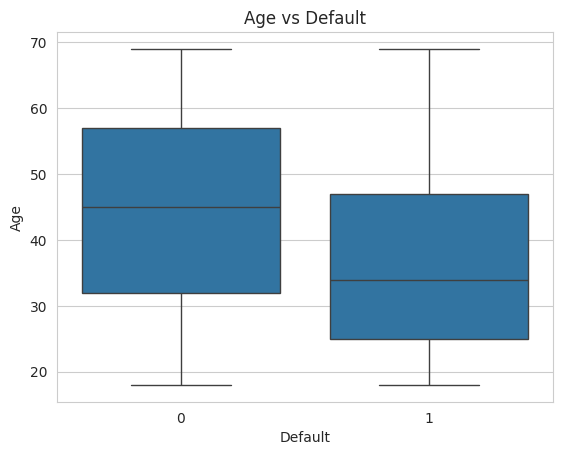

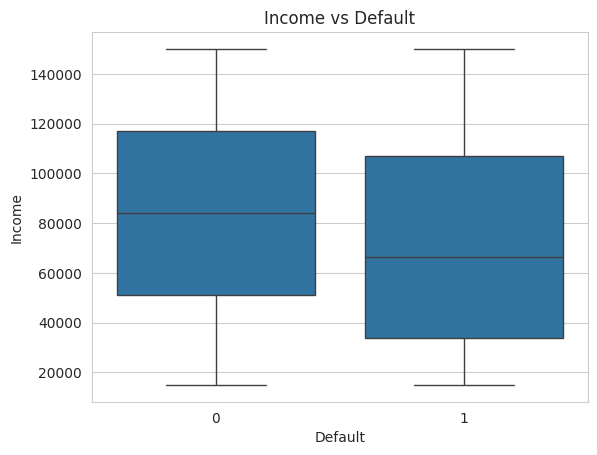

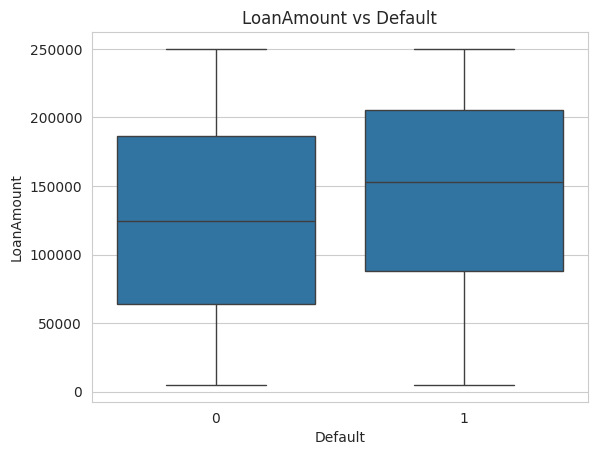

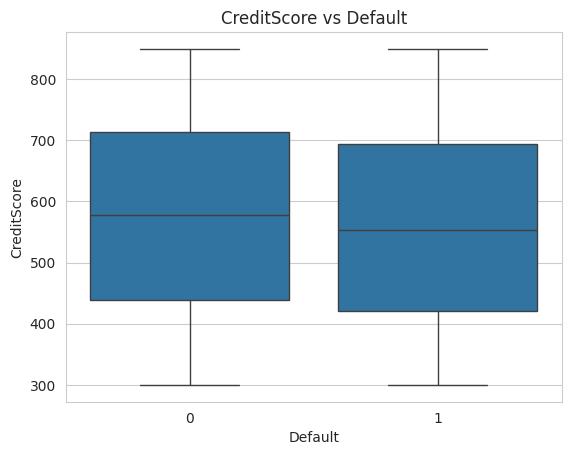

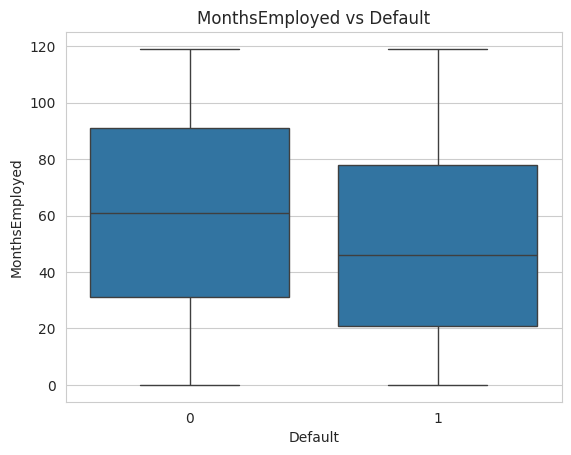

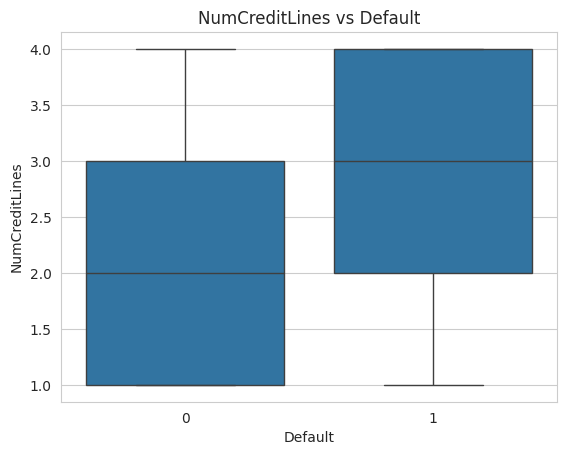

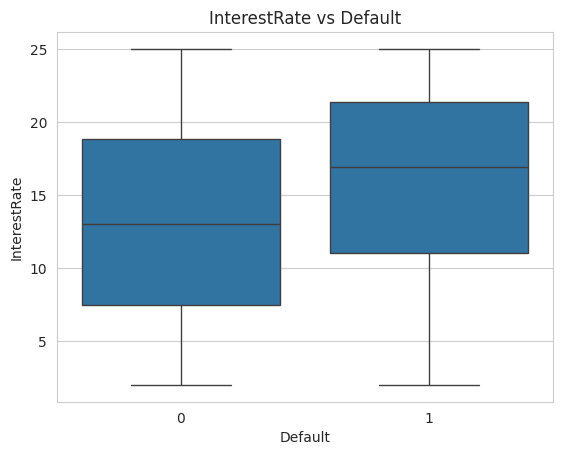

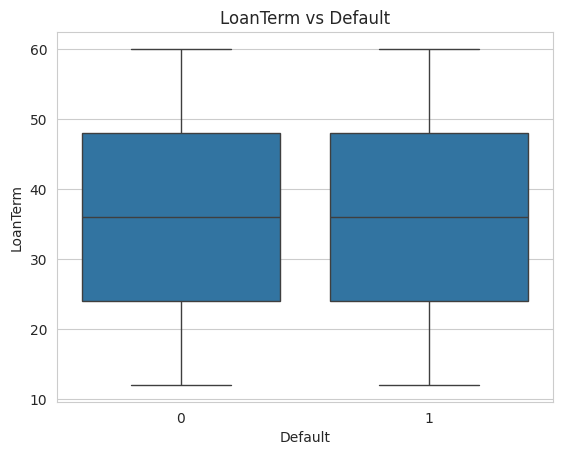

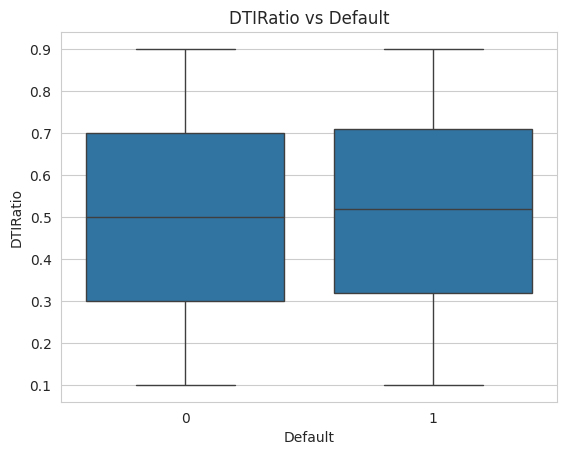

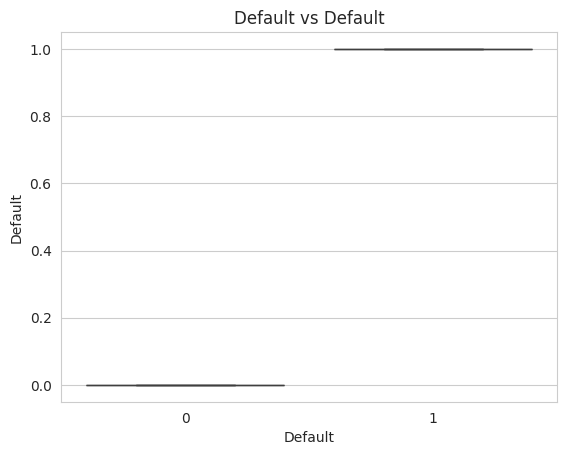

In [44]:
for col in num_cols:
    plt.figure()
    sns.boxplot(x="Default", y=col, data=df)
    plt.title(f"{col} vs Default")
    plt.show()


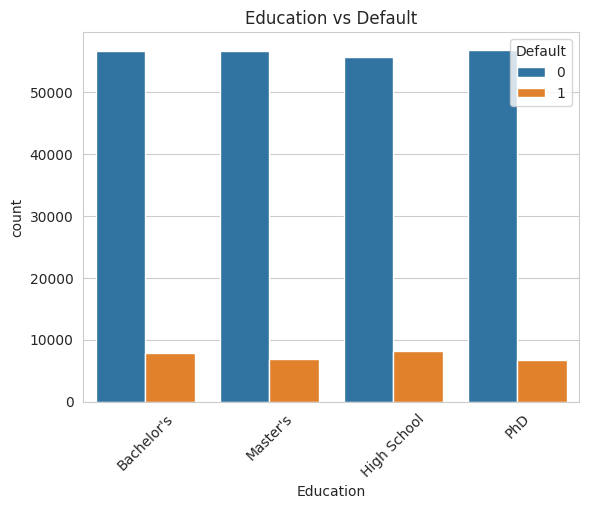

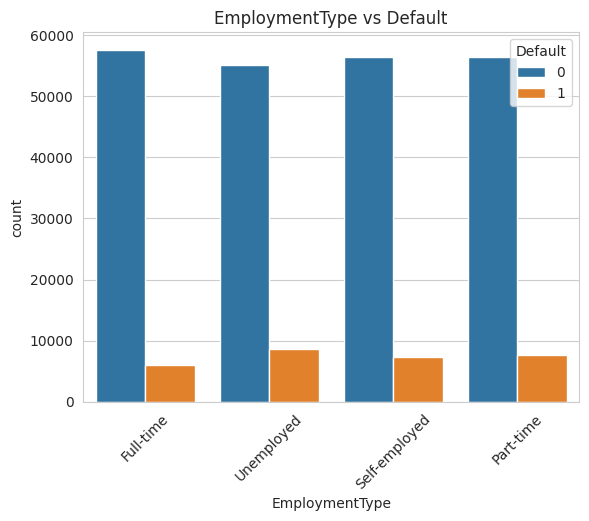

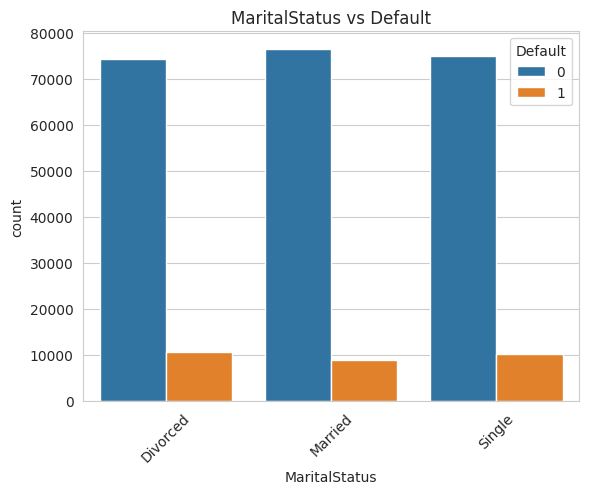

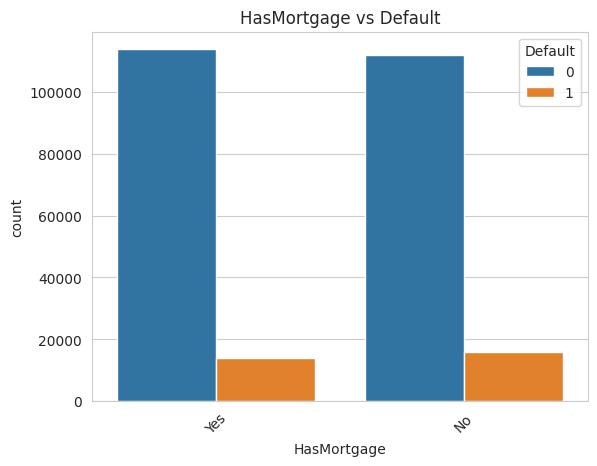

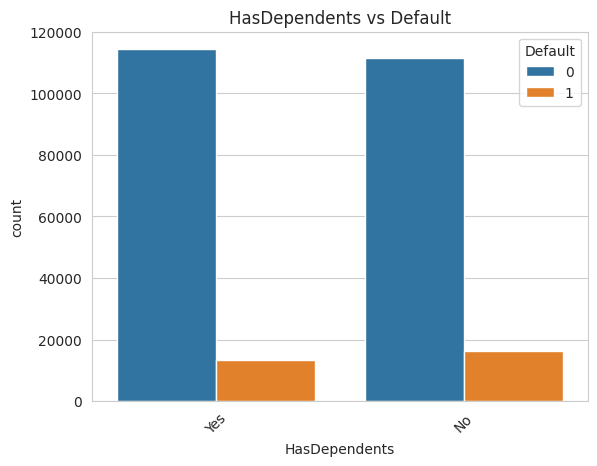

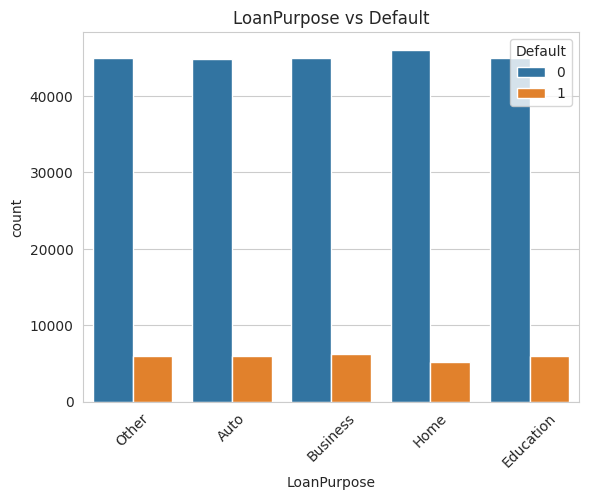

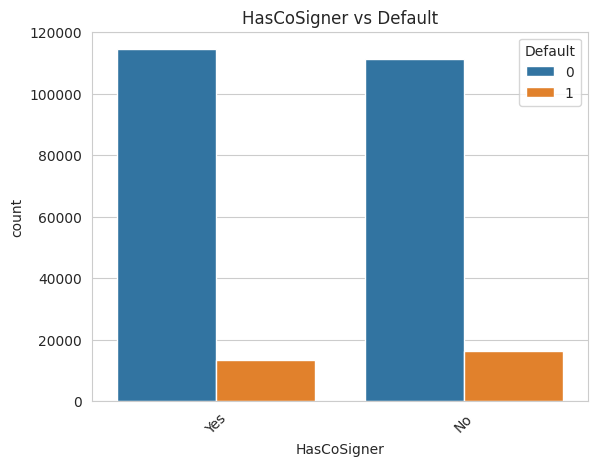

In [46]:
for col in cat_cols:
    plt.figure()
    sns.countplot(x=col, hue="Default", data=df)
    plt.xticks(rotation=45)
    plt.title(f"{col} vs Default")
    plt.show()


## Correlation Matrix

We evaluate relationships between numerical features and identify multicollinearity.


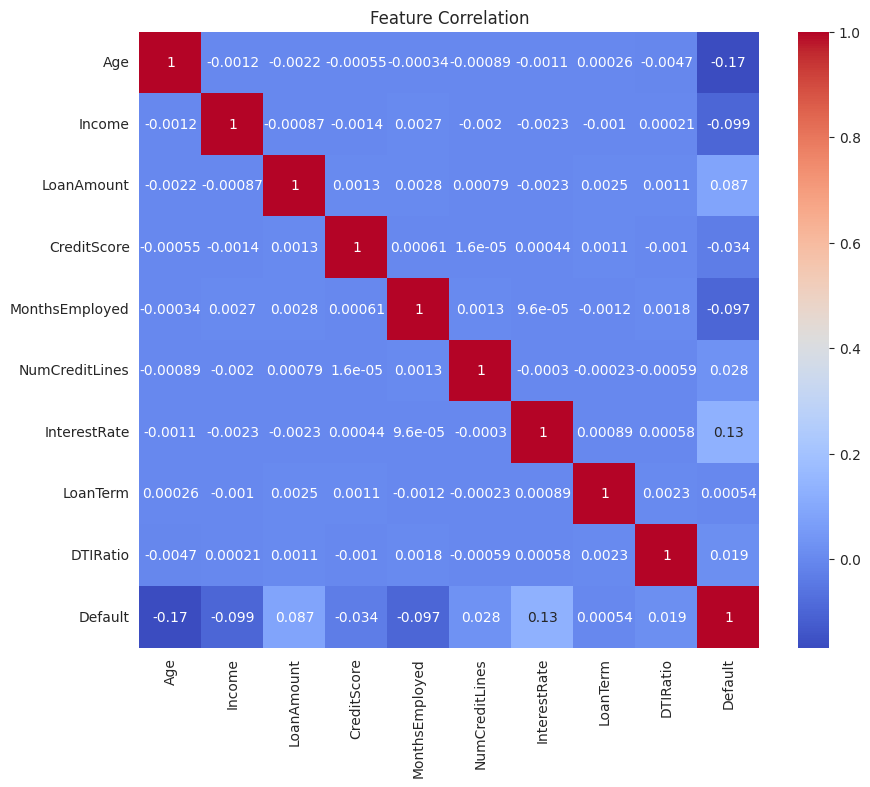

In [47]:
plt.figure(figsize=(10,8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()


# EDA Summary

Key findings:

- Dataset shows class imbalance in default variable
- Financial features contain skewness and outliers
- Missing values present in multiple columns
- Loan burden–related variables strongly associated with default
- Some correlated financial features detected

These insights guide preprocessing and feature engineering steps.
